<a href="https://colab.research.google.com/github/beomseokwee/pythonBigData/blob/main/%EB%94%A5_%EB%9F%AC%EB%8B%9D2%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 상태 및 파라미터 저장




In [2]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
test_scaled = test_input/255.0

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# flat_layer = keras.layers.Flatten(input_shape=(28,28)) # 28*28로 들어온걸 일자로 만들어 주는게 flatten
# dense1 = keras.layers.Dense(100,activation = 'sig moid')# 100이 입력이 된다.
# dense2 = keras.layers.Dense(10,activation='softmax')
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation = 'sigmoid'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
 # 10개중에 7개만 사용 , 학습할때마다 switch??, #히든계층에서 입력되는 입력계층의 절반은 off된 상태로,오버핏 발생 해결, 시간 절약

model.compile(optimizer='adam',loss = keras.losses.sparse_categorical_crossentropy,metrics = 'accuracy',)
model.summary() # 피팅을 할때 차이가 생긴다

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
hist = model.fit(train_scaled, train_target,epochs=30,validation_split=0.2) # 검증하는데 사용이 자동으로 된다 train_scaled에서

Epoch 1/30
 923/1500 [=================>............] - ETA: 1s - loss: 0.8374 - accuracy: 0.7106

KeyboardInterrupt: ignored

In [ ]:
model.save_weights('model-weights.h5') # 79510개 파라미터만 저장

In [ ]:
model.save('model-whole.hs') # 모델 자체 저장

In [ ]:
!ls -al

In [ ]:
import sys
print(sys.path)

In [ ]:
model2 = keras.models.load_model('model-whole.hs')
model2.summary()

In [ ]:
print(model2.weights)

In [ ]:
model2.evaluate(test_scaled,test_target)

# 콜백
- 내가 함수를 호출하는 것이 아니라 다른 함수에서 호출하는 것: 콜백함수(callback)

In [ ]:
def add(a,b):
  print(f'add:{a},{b}')
  return a+b

In [ ]:
def sub(a,b):
  print(f'add:{a},{b}')
  return a+b

In [ ]:
def doall(ls1,ls2,fn):
  s=[]
  for i in range(len(ls1)):
    s.append(fn(ls1[i],ls2[i]))
  return s  

In [ ]:
re = doall([1,2,3],[4,5,6],add) # 여기서 add는 콜백함수
print(re)

In [ ]:
re = doall([1,2,3],[4,5,6],sub) # 여기서 add는 콜백함수
print(re)

In [5]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation = 'sigmoid'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
 # 10개중에 5개만 사용 , 학습할때마다 switch??, #히든계층에서 입력되는 입력계층의 절반은 off된 상태로,오버핏 발생 해결, 시간 절약
model.compile(optimizer='adam',loss = keras.losses.sparse_categorical_crossentropy,metrics = 'accuracy',)
model.summary() # 피팅을 할때 차이가 생긴다

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
hist = model.fit(train_scaled, train_target,epochs=30,validation_split=0.2,callbacks=[checkpoint_cb])

Epoch 1/30
 820/1500 [===============>..............] - ETA: 1s - loss: 0.8768 - accuracy: 0.6989

KeyboardInterrupt: ignored

In [ ]:
model3 = keras.models.load_model('best-model.h5')
model3.summary()

In [ ]:
model3.evaluate(test_scaled,test_target)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation = 'sigmoid'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
 # 10개중에 7개만 사용 , 학습할때마다 switch??, #히든계층에서 입력되는 입력계층의 절반은 off된 상태로,오버핏 발생 해결, 시간 절약
model.compile(optimizer='adam',loss = keras.losses.sparse_categorical_crossentropy,metrics = 'accuracy',)
model.summary() # 피팅을 할때 차이가 생긴다

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
hist = model.fit(train_scaled, train_target,epochs=1500,validation_split=0.2,callbacks=[checkpoint_cb,early_stopping_cb])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# CNN
- 축소하는 작업을pooling 이라고 함

In [7]:
keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding='same') # same으로 원본이미지랑 같은이미지로 나올수 있게 적절하게 패딩을 해주는것

In [8]:
keras.layers.MaxPool2D(2)

In [9]:
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [10]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [11]:
trainr_input = train_input.reshape(-1,28,28,1) # 60000*28*28 >> 60000*28*28*1
test_rinput = test_input.reshape(-1,28,28,1)
trainr_input.shape

(60000, 28, 28, 1)

In [12]:
train_scaled = trainr_input/255.0
test_scaled = test_input/255.0
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation = 'relu',padding='same',input_shape=(28,28,1))) # 사이즈 = 3by3 , activation을 relu를 주는걸 권장,커널은 32개
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(16,kernel_size=3,activation = 'relu',padding='same')) # 사이즈 = 3by3 , activation을 relu를 주는걸 권장,커널은 32개
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0,5))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)              

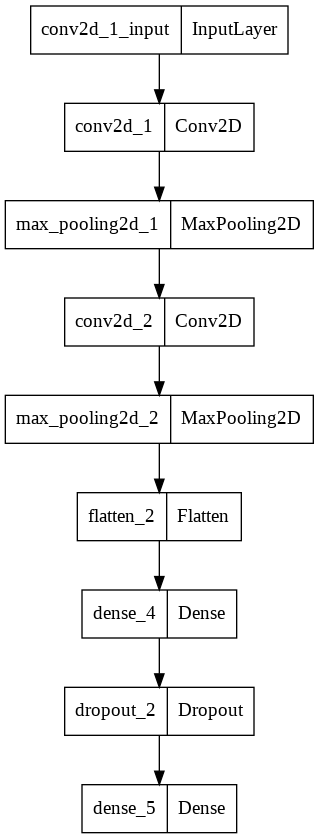

In [13]:
keras.utils.plot_model(model)

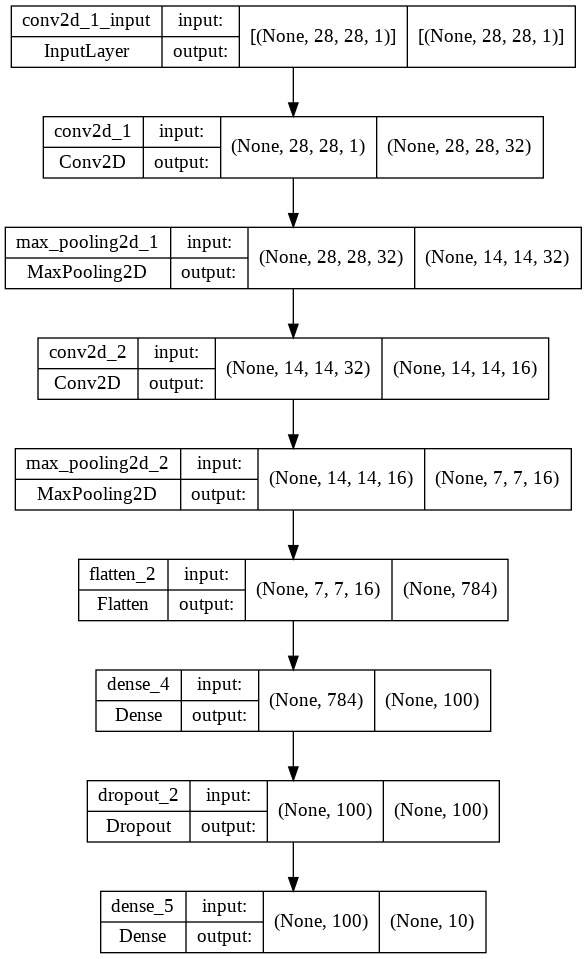

In [14]:

keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

history = model.fit(train_scaled,train_target,validation_split=0.2,epochs=30000,callbacks=[early_stopping_cb])

In [15]:
model = keras.Sequential() 
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Conv2D(16,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [16]:
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

history = model.fit(train_scaled,train_target,validation_split=0.2,epochs=30000,callbacks=[early_stopping_cb])

Epoch 1/30000
  77/1500 [>.............................] - ETA: 40s - loss: 1.5465 - accuracy: 0.4383

KeyboardInterrupt: ignored

In [17]:
model.evaluate(train_scaled, test_target)

ValueError: ignored

In [ ]:

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_scaled, test_target)

In [ ]:
plt.imshow(test_scaled[0].reshape(28,28),cmap='gray')
plt.show()


In [ ]:
preds = model.predict(test_scaled[0:1])
print(preds)

In [ ]:
model.save('best-cnn-model.h5')

In [ ]:
model.layers

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

In [ ]:
print(conv.weights)

In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean,conv_weights.std())

In [ ]:
plt.bar(range)

In [ ]:
fig,axs = plt.subplots(2,16)
# 현재 컨텍스트를 2x2 구간으로 나눈다.
# fig는 전체 figure?
# axs는 2x2의 배열이며, 각 차트에 대응한다.
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin = -0.5 , vmax = 0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
model2 = keras.Sequential() 
model2.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model2.add(keras.layers.MaxPool2D(2))

model2.add(keras.layers.Conv2D(16,kernel_size=3,activation='relu',padding='same'))
model2.add(keras.layers.MaxPool2D(2))

model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(100,activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(10,activation='softmax'))
model2.summary()
model2.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')



In [ ]:
conv2 = model2.layers[0]
conv_weights2 = conv2.weights[0].numpy()
fig,axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights2[:,:,0,i*16+j],vmin = -0.5 , vmax = 0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
lr.coef_ = np.random.uniform(0,1)
print(lr.coef_)

In [ ]:
print(model.input)

In [ ]:
print(model.layers[0].output) # 패딩을 줌으로써 원본이미지와 사이즈가 똑같아진다.특성맵 = 32

In [ ]:
conv_acti = keras.Model(model.input,model.layers[0].output)
print(conv_acti)

In [ ]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0 #3차원으로
inputs.shape

In [ ]:
train_scaled[0:1].shape # inputs 데이터와 같다

In [ ]:
inputs # 

In [ ]:
feature_maps = conv_acti.predict(inputs) # 컴프리션 연산 한번??

In [ ]:
print(feature_maps.shape)

In [ ]:
fig,axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8 +j])
    axs[i,j].axis('off')
plt.show()     # 특성맵 32개

# 보너스 강의 - OpenCV 맛
- HSV
- 색채명

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
import numpy as np
image=np.zeros((100,255,3),np.uint8) # 높이가 100 너비가 180인 채널이 3개임 , 각각이 다 0 , unit = 8비트, 0부터 255까지 표현가능

In [ ]:
for i in range(0,255):
  image[:,i,0]=i
image[:,:,1]=255
image[:,:,2]=255
img = cv2.cvtColor(image,cv2.COLOR_HSV2BGR)
cv2_imshow(img)

In [ ]:
image=np.zeros((100,255,3),np.uint8)
image[:,:,0]=0
for i in range(0,255):
  image[:,i,1]=i
image[:,:,2]=255
img = cv2.cvtColor(image,cv2.COLOR_HSV2BGR)
cv2_imshow(img)

In [ ]:
image=np.zeros((100,255,3),np.uint8)
image[:,:,0]=0
for i in range(0,255):
  image[:,i,2]=i
image[:,:,1]=255
img = cv2.cvtColor(image,cv2.COLOR_HSV2BGR)
cv2_imshow(img) # 밝기를 아예 안주는것?

In [ ]:
path = '/content/sample_data/딥러닝 실습 사진 1.png'
src_image = cv2.imread(path,cv2.IMREAD_COLOR)
cv2_imshow(src_image)

In [ ]:
cpy_impage = src_image.copy()
gray_image = cv2.cvtColor(src_image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image) #처리 속도 차이

In [ ]:
src_image.shape, gray_image.shape

In [ ]:
blur_image = cv2.GaussianBlur(gray_image,(3,3),0)
cv2_imshow(blur_image)

In [ ]:
canny_image = cv2.Canny(blur_image,100,200)
cv2_imshow(canny_image)

In [ ]:
contours, _ = cv2.findContours(canny_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) # 테두리?
store_xywh=[] # 기존에 있었던걸 보관
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  if w>30 and h>=40:
    for sv in store_xywh:
      gx = abs(sv[0]-x)
      gy = abs(sv[1]-y)
      if gx<5 and gy<5:
        flag = True
        break
  else:
    flag=True
  if flag == False:

    store_xywh.append([x,y,w,h]) 
    
for sv in store_xywh:
  print(sv)



In [ ]:
contours, _ = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)     # 테두리 조사(폐곡선)

store_xywh = []
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  #print(x,y,w,h)
  flag = False
  if w>30 and h>=40:      # 특정 면적 정도는 무시? .. 폐곡선
    #print(x,y,w,h)        # output 동일 value 2개씩 return > 안쪽 + 바깥쪽 폐곡선
    for sv in store_xywh:
        gx = abs(sv[0]-x)
        gy = abs(sv[1]-y)
        if gx<5 and gy<5:
          flag = True
          break
  else:
    flag = True
  if flag == False:
    store_xywh.append([x,y,w,h])
    
for sv in store_xywh:
  print(sv)

In [ ]:
for sv in store_xywh:
  x,y,w,h=sv
  cv2.rectangle(src_image,(x-10,y-10),(x+w+20,y+h+20),(0,255,0),1)
cv2_imshow(src_image)  

In [ ]:
(image_train,label_train),(image_test,label_test) = keras.datasets.mnist.load_data()

In [ ]:
print(image_train.shape)

In [ ]:
np.unique(label_train,return_counts=True)

In [ ]:
from sklearn import svm

In [ ]:
image_train2 = image_train.reshape(-1,28*28)
image_test2 = image_test.reshape(-1,28*28)

In [ ]:
svm= svm.SVC() #svm의 분류 모델생성
svm.fit(image_train2,label_train)

In [ ]:
pval = svm.predict(image_test2)

In [ ]:
from sklearn import metrics
score = metrics.accuracy_score(pval, label_test)
print(score)

In [ ]:
from keras.utils import np_utils 
label_train2 = np_utils.to_categorical(label_train)
label_test2 = np_utils.to_categorical(label_test)
print(label_train[0])
print(label_train2[0])

In [ ]:
scaled_train = image_train/255.0
scaled_test = image_test/255.0

In [ ]:
from keras import layers,models
model = models.Sequential()
model.add(layers.Dense(100,activation='relu', input_shape = (784,)))
#model.add(layers.Dense(28,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
history = model.fit(image_train2,label_train2,epochs=100)

In [ ]:
score = model.evaluate(image_test2,label_test2)
print(score)